In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Networkmodel import NetworkModel_org, HopField

In [7]:
2/10

0.2

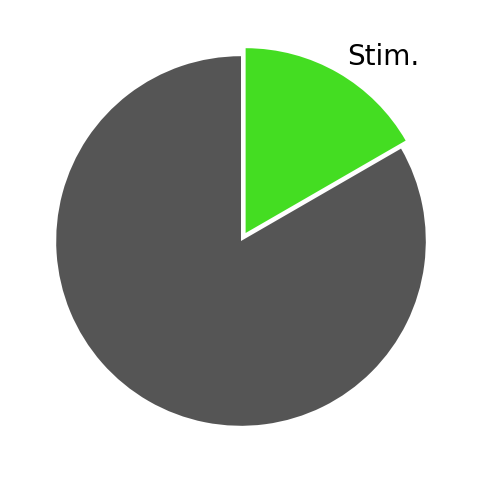

In [8]:
x = [200,1000]
label = ["Stim.", ""]
colors = ["#44dd22","#555555"]
plt.figure(figsize = (6,6))
plt.pie(x, labels=label, counterclock=False, startangle=90,
        explode=[0.05, 0], colors=colors,textprops={'fontsize': 20})
plt.savefig("./figure/pie.png", bbox_inches = "tight")

In [9]:
class NetworkModel(NetworkModel_org):
    def task_condition(self):
        self.condition = np.array([1,2,3,4,5,6]) 
        self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [1], 5: [1], 6: [2]}
        self.initial = 1
        self.terminal = [4,5]
        self.prob = 0.5
        self.stmdict = {1: [1], 2: [2.1,2.2], 3: [3], 4:[4], 5:[5], 6: [6]}
        self.cortex_calc = [1,6]
        self.stmindex = {1:0, 2:int(np.random.rand() < self.prob), 3:0, 4:0, 5:0, 6:0}
        self.swblock = 30
        self.HFregister = dict()
        self.condact = {i:[] for i in self.condition}
        for key,val in self.stmdict.items():
            for s in val:
                tmp = np.zeros(self.nstm)
                tmp[np.sort(np.random.choice(len(tmp), int(len(tmp)/2), replace = False))] = 1  
                self.HFregister[s] = tmp

    def check_rwd(self, result, count):
        if not result[-1]["cond"] in self.terminal:
            return 0
        swmode = np.mod(np.floor(count/self.swblock),2)
        tmp1 = sum([result[i]["infcond"] for i in range(len(result))], [])
        tmp2 = [result[i]["cond"] for i in range(len(result))]
        initial = 1 if np.mod(np.floor((count+1)/self.swblock),2) == 0 else 6
        if initial != self.initial:
            self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [initial], 5: [initial], 6: [2]}
            self.initial = None
        if self.stmindex[2] == 0:
            self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
            return int(4 in tmp2) if swmode == 0 else int(5 in tmp2)
        else:
            self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
            return int(5 in tmp2) if swmode == 0 else int(4 in tmp2)


In [10]:
allresult = dict()
x = 0

In [11]:
hp = NetworkModel(200,1000,300,1200,8)
result = []
HCprev = []
cond = None
for i in range(120):
    result_,HCprev,cond = hp.process(i, HCprev, cond, verbose = True)
    result.append(result_)
allresult[x] = result
x += 1 

trial 0 stmindex 1 HCprev []
HCprev []
think 0-0 [120]
plan 1 [] 2
init 1 2
memo 1 0
HF2HC [182] 1-0
HC2HF [182] 1-0
pkup [182] 1-0
choose [1. 2.] [182 213]
stmremap [-1] [213] []
HCprev [[213]]
think 0-0 [37]
plan 2 [] 4
init 2 4
memo 2 0
HF2HC [75] 2.2-0
HC2HF [75] 2.2-0
pkup [75] 2.2-0
HC2HF [213] [2.2 0. ]
remove [1.  2.2 4. ] [182 213  75 155]
HF2HC [75] 2.2-0
HC2HF [75] 2.2-0
HCprev [array([155], dtype=int64)]
think 0-0 [298]
plan 4 [] 1
init 4 1
memo 4 0
HF2HC [294] 4-0
HC2HF [294] 4-0
pkup [294] 4-0
choose [4. 1.] [294 196]
HC2HF [155] 4-0
HF2HC [294] 4-0
HC2HF [294] 4-0
check trans [4.0] {}
['c:1', 'n:4.0', 'e:0.0', 'i:[1.0, 2.2]', 'p:[1.0, 2.0]', 'H:[182 213  75 155]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[155 294 196]', 'a:4-0', 'r:0', "p:['1-0', '2.2-0', '4-0']"]

trial 1 stmindex 0 HCprev 196
HCprev [array([196], dtype=int64)]
external stm 1
think 1-0 [182]
external stm 1
think 1-0 [182]
external stm 1
think 1-0 [182]
external stm 1
th

HC2HF [75] [2.2 0. ]
remove [1.  2.2] [182 213  75 121]
HF2HC [75] 2.2-0
HC2HF [75] 2.2-0
HCprev [array([182], dtype=int64), array([213], dtype=int64), array([75], dtype=int64), array([121], dtype=int64)]
think 2.2-2 [228]
choose [2.2 5. ] [228 221 181  97]
HC2HF [121] 2.2-2
HF2HC [228] 2.2-2
HC2HF [228] 2.2-2
check trans [2.1, 2.2, 5.0] {}
['c:1', 'n:2.2', 'e:0.622850484375', 'i:[1.0, 2.2]', 'p:[1.0, 2.1, 4.0]', 'H:[196 182 213  75 121]', 'a:1-0', 'r:0']
['c:2', 'n:5.0', 'e:0.15', 'i:[2.2, 5.0]', 'p:[2.2, 5.0]', 'H:[182 213  75 121 228 221 181  97]', 'a:2.2-2', 'r:0']
['c:5', 'n:1', 'e:0.15', 'i:[2.2, 5.0]', 'p:[2.2, 5.0]', 'H:[182 213  75 121 228 221 181  97]', 'a:5-0', 'r:1', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0']"]

trial 13 stmindex 0 HCprev 97
HCprev [array([97], dtype=int64)]
external stm 1
think 1-0 [182]
external stm 1
think 1-0 [182]
external stm 1
think 1-0 [182]
external stm 1
think 1-0 [182]
external stm 1
think 1-0 [182]
external stm 1
think 1-0 [182]


think 1-0 [182]
choose [1.  2.1 4. ] [182 213  13 200 224 100]
stmremap [13] [213] [13 75]
HCprev [[75]]
think 2.2-0 [75]
HC2HF [75] [2.2 0. ]
remove [1.  2.2 4. ] [182 213  75 155]
HF2HC [75] 2.2-0
HC2HF [75] 2.2-0
HCprev [array([182], dtype=int64), array([213], dtype=int64), array([75], dtype=int64), array([155], dtype=int64)]
think 4-0 [294]
choose [4. 1.] [294 196]
HC2HF [155] 4-0
HF2HC [294] 4-0
HC2HF [294] 4-0
check trans [1.0, 2.1, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9126457808987484', 'i:[1.0, 2.2, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[100 182 213  75 155]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[182 213  75 155 294 196]', 'a:4-0', 'r:0', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0']"]

trial 28 stmindex 1 HCprev 196
HCprev [array([196], dtype=int64)]
think 1-0 [182]
choose [1.  2.1 4. ] [182 213  13 200 224 100]
stmremap [13] [213] [13 75]
HCprev [[75]]
think 2.2-0 [75]
HC2HF [75] [2.2 0. ]
remove [1.  2.2 4. ] [182 213  75 155]


choose [4. 6.] [177 238]
HC2HF [60] 4-3
HF2HC [177] 4-3
HC2HF [177] 4-3
check trans [6.0, 2.1, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.622850484375', 'i:[6.0, 2.1, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 51  24  61 127  60]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.0', 'i:[4.0, 6.0]', 'p:[4.0, 6.0]', 'H:[ 24  61 127  60 177 238]', 'a:4-3', 'r:0', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0', '6-0', '2.2-3', '4-2', '2.1-4', '4-3']"]

trial 39 stmindex 0 HCprev 238
HCprev [array([238], dtype=int64)]
think 6-0 [24]
choose [6.  2.2 4. ] [ 24  61 132  94 248  51]
stmremap [132] [61] [127 132]
HCprev [[127]]
think 2.1-4 [127]
plan 2 [4] 5
actremapping [127  60] [127 192]
HC2HF [127] [2.1 4. ]
remove [6.  2.1 5. ] [ 24  61 127 192]
HF2HC [127] 2.1-4
HC2HF [127] 2.1-4
HCprev [array([192], dtype=int64)]
think 0-0 [43]
plan 5 [] 6
init 5 6
memo 5 1
HF2HC [125] 5-1
HC2HF [125] 5-1
pkup [125] 5-1
choose [5. 6.] [125 119]
HC2HF [192] 5-1
HF2HC [125] 5-1
HC2HF [125] 5-1
check trans [5.0] {}
['c:6', 'n:

check trans [6.0, 2.1, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.7275094749609375', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 51  24  61 132  94 248  51]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.7275094749609375', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 51  24  61 132  94 248  51]', 'a:4-2', 'r:1', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0', '6-0', '2.2-3', '4-2', '2.1-4', '4-3', '5-1']"]

trial 56 stmindex 0 HCprev 51
HCprev [array([51], dtype=int64)]
think 6-0 [24]
choose [6.  2.2 4. ] [ 24  61 132  94 248  51]
stmremap [132] [61] [127 132]
HCprev [[127]]
think 2.1-4 [127]
HC2HF [127] [2.1 4. ]
remove [6.  2.1 5. ] [ 24  61 127 192 125 119]
HF2HC [127] 2.1-4
HC2HF [127] 2.1-4
tested ['2.1-4', '4.0-1', '2.2-3', '6.0-0', '4.0-2', '2.1-1', '5.0-1', '1.0-0']
check trans [6.0, 2.1, 5.0, 6.0] {}
['c:6', 'n:5.0', 'e:0.7683830537167969', 'i:[6.0, 2.1, 5.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 51  24  61 127 192 125 119]', 'a:6-0', 'r:0']
['c:5', 'n:6', 'e:0.7683830537167969', 'i:[6.0

choose [1.  2.1 4. ] [182 213  13 200 224 100]
HC2HF [97] 1-0
HF2HC [182] 1-0
HC2HF [182] 1-0
tested ['2.1-4', '4.0-1', '2.2-3', '6.0-0', '4.0-2', '2.1-1', '5.0-1', '1.0-0']
check trans [1.0, 2.1, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9719962387914384', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[ 97 182 213  13 200 224 100]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.9719962387914384', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[ 97 182 213  13 200 224 100]', 'a:4-1', 'r:1', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0', '6-0', '2.2-3', '4-2', '2.1-4', '4-3', '5-1']"]

trial 72 stmindex 0 HCprev 100
HCprev [array([100], dtype=int64)]
think 1-0 [182]
choose [1.  2.1 4. ] [182 213  13 200 224 100]
HC2HF [100] 1-0
HF2HC [182] 1-0
HC2HF [182] 1-0
tested ['2.1-4', '4.0-1', '2.2-3', '6.0-0', '4.0-2', '2.1-1', '5.0-1', '1.0-0']
check trans [1.0, 2.1, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9761968029727226', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[100 182 213  13 200 224 100]', 'a:1-

choose [1.  2.1 4. ] [182 213  13 200 224 100]
stmremap [13] [213] [13 75]
HCprev [[75]]
think 2.2-0 [75]
HC2HF [75] [2.2 0. ]
remove [1.  2.2 4. ] [182 213  75 155]
HF2HC [75] 2.2-0
HC2HF [75] 2.2-0
HCprev [array([182], dtype=int64), array([213], dtype=int64), array([75], dtype=int64), array([155], dtype=int64)]
think 4-0 [294]
choose [4. 1.] [294 196]
HC2HF [155] 4-0
HF2HC [294] 4-0
HC2HF [294] 4-0
check trans [1.0, 2.1, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9910226357708359', 'i:[1.0, 2.2, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[100 182 213  75 155]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[182 213  75 155 294 196]', 'a:4-0', 'r:0', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0', '6-0', '2.2-3', '4-2', '2.1-4', '4-3', '5-1']"]

trial 84 stmindex 1 HCprev 196
HCprev [array([196], dtype=int64)]
think 1-0 [182]
choose [1.  2.1 4. ] [182 213  13 200 224 100]
stmremap [13] [213] [13 75]
HCprev [[75]]
think 2.2-0 [75]
HC2HF [75] [2.2 0. ]
remove [1

HF2HC [132] 2.2-3
HC2HF [132] 2.2-3
tested ['2.1-4', '4.0-1', '2.2-3', '6.0-0', '4.0-2', '2.1-1', '5.0-1', '1.0-0']
check trans [6.0, 2.1, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.8790945064342538', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.1, 5.0]', 'H:[119  24  61 132  94 248  51]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.8790945064342538', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.1, 5.0]', 'H:[119  24  61 132  94 248  51]', 'a:4-2', 'r:1', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0', '6-0', '2.2-3', '4-2', '2.1-4', '4-3', '5-1']"]

trial 96 stmindex 0 HCprev 51
HCprev [array([51], dtype=int64)]
think 6-0 [24]
choose [6.  2.2 4. ] [ 24  61 132  94 248  51]
stmremap [132] [61] [127 132]
HCprev [[127]]
think 2.1-4 [127]
HC2HF [127] [2.1 4. ]
remove [6.  2.1 5. ] [ 24  61 127 192 125 119]
HF2HC [127] 2.1-4
HC2HF [127] 2.1-4
tested ['2.1-4', '4.0-1', '2.2-3', '6.0-0', '4.0-2', '2.1-1', '5.0-1', '1.0-0']
check trans [6.0, 2.1, 5.0, 6.0] {}
['c:6', 'n:5.0', 'e:0.8972303304691157', 'i:[6.0, 2.1, 5.0]', 'p

tested ['2.1-4', '4.0-1', '2.2-3', '6.0-0', '4.0-2', '2.1-1', '5.0-1', '1.0-0']
check trans [6.0, 2.1, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.9797672825268142', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 51  24  61 132  94 248  51]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.9797672825268142', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 51  24  61 132  94 248  51]', 'a:4-2', 'r:1', "p:['1-0', '2.2-0', '4-0', '2.1-1', '4-1', '2.2-2', '5-0', '6-0', '2.2-3', '4-2', '2.1-4', '4-3', '5-1']"]

trial 114 stmindex 1 HCprev 51
HCprev [array([51], dtype=int64)]
think 6-0 [24]
choose [6.  2.1 5. ] [ 24  61 127 192 125 119]
stmremap [127] [61] [127 132]
HCprev [[132]]
think 2.2-3 [132]
HC2HF [132] [2.2 3. ]
remove [6.  2.2 4. ] [ 24  61 132  94 248  51]
HF2HC [132] 2.2-3
HC2HF [132] 2.2-3
tested ['2.1-4', '4.0-1', '2.2-3', '6.0-0', '4.0-2', '2.1-1', '5.0-1', '1.0-0']
check trans [6.0, 2.1, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.9670543985781628', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.1, 5.0]', 'H:[ 51  24  61 

In [17]:
num = 40
trialnum = 120
allresult = dict() #np.zeros((num,trialnum))*np.nan
x = 0
errcounter = 0
odds = dict()
while x < num:
    print(x)
    hp = NetworkModel(200,1000,300,1200,8)
    result = []
    HCprev = []
    cond = None
    try:
        for i in range(trialnum):
            result_,HCprev,cond = hp.process(i, HCprev, cond,verbose = False)
            result.append(result_)
        allresult[x] = result
        odds[x] = hp.oddcounter
    except:
        print("error",x)
        allresult[x] = result
        errcounter += 1
    x += 1
print(errcounter)
oddcounter = {k2: {k:v for k,v in odds[k2].items()} for k2 in odds.keys()}

0
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
1
init 1 2
init 2 5
init 5 1
actremapping [ 13 159  73 265] [ 13 159  73 199]
init 4 1
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
actremapping [134 201 218 287] [134 201 218 215]
init 4 6
init 2 5
init 5 6
2
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [254 147  18 297] [254 147  18 124]
init 2 5
init 5 1
actremapping [254 147  27 233] [254 147  27 223]
init 2 4
init 4 1
actremapping [14 44] [ 14 216]
init 5 1
actremapping [188  13] [188 252]
init 4 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
3
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
actremapping [275 124] [275 182]
init 4 1
actremapping [79 91] [ 79 133]
init 5 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
4
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
5
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
actremapping [102 110 147 135] [102 110 147  32]
actremapping

init 6 2
init 2 5
init 5 6
forget 6-5 [176] []
forget 6-7 [13] []
forget 6-6 [197] []
forget 6-2 [18] []
forget 6-1 [100] []
forget 6-3 [149] []
forget 6-4 [99] []
init 6 2
forget 2.2-21 [198] [258]
forget 2.2-23 [157] []
forget 2.1-20 [277] [207]
forget 2.2-24 [5] [155]
forget 2.2-22 [297] []
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
28
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [ 33 298  56 238] [ 33 298  56 147]
init 4 1
actremapping [267  66] [267  57]
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
actremapping [258  67  75 215] [258  67  75 221]
actremapping [258  67  95   5] [258  67  95 208]
init 2 5
init 5 6
init 2 4
init 4 6
actremapping [216 206] [216 114]
init 4 6
init 6 2
init 2 5
init 5 6
init 2 5
init 5 6
actremapping [205 295] [205  49]
init 4 6
29
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [182 224  73 215] [182 224  73 111]
init 2 5
init 5 1
init 1 2

In [26]:
with open("./pkls/switch_prob_2cond_0.5.pkl", mode = "wb") as f:
    pickle.dump(allresult, f)
    pickle.dump(oddcounter, f)

In [14]:
with open("./pkls/switch_prob_2cond_0.5.pkl", mode = "rb") as f:
    allresult = pickle.load(f)
    oddcounter = pickle.load(f)
num = len(allresult)
trialnum = np.max([len(allresult[x]) for x in range(num)])

In [3]:
rwdrate = np.zeros((num,trialnum))
for x in range(num):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp

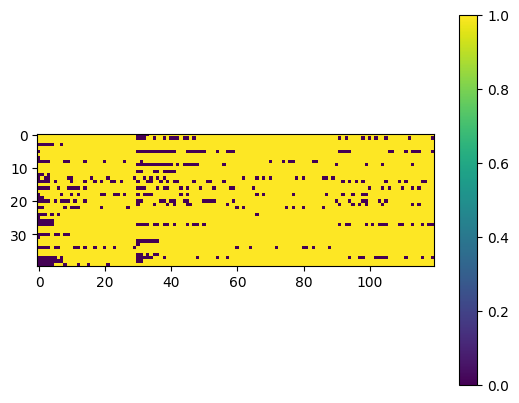

In [4]:
plt.imshow(rwdrate)
plt.colorbar()

(-5.0, 105.0)

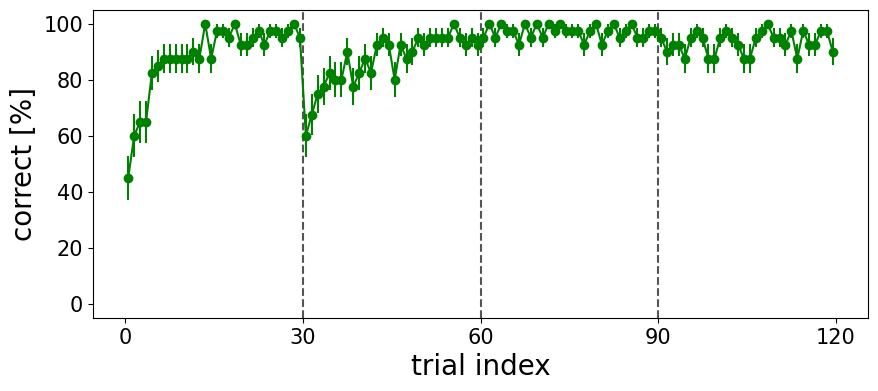

In [12]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-5,105], "--",color = "#555555")
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
#plt.savefig("./figure/switch_prob_2cond_{}_correct.png".format(hp.prob), bbox_inches = "tight")

In [28]:
inflen = np.zeros((num,trialnum))*np.nan
for x in range(num):
    tmp = []
    for r in range(len(allresult[x])):
        infcond = allresult[x][r][0]["infcond"]
        preinf = allresult[x][r][0]["preinf"]
        ln = int((len(allresult[x][r][-1]["HCtrans"])-1)/2)
        if set(infcond) != set(preinf):
            for y in range(np.min([len(infcond), len(preinf)])):
                if infcond[y] == preinf[y] and ln > 1:
                    ln -= 1
                else:
                    break
        tmp.append(ln)
    #tmp = [int((len(allresult[x][r][-1]["HCtrans"])-1)/2) for r in range(len(allresult[x]))]
    inflen[x,:len(tmp)] = tmp

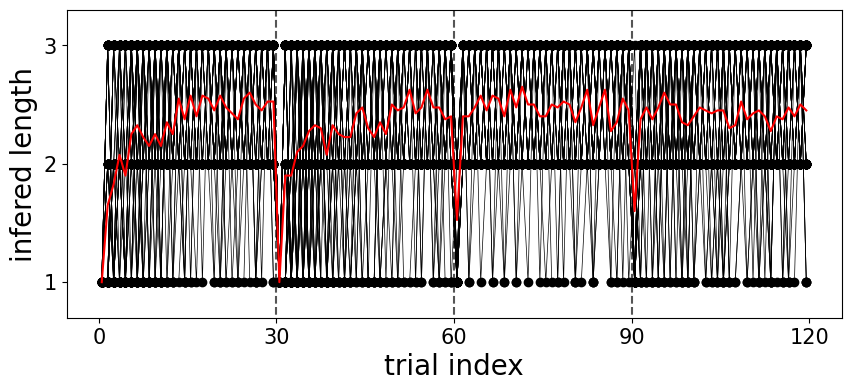

In [27]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,5], "--",color = "#555555")
for i in range(num):
    plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.5)
plt.plot(np.arange(trialnum), np.nanmean(inflen,0), "r")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("infered length", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks([1,2,3],fontsize = 15)
plt.ylim([.7,3.3])
plt.savefig("./figure/switch_prob_2cond_{}_inflen.png".format(hp.prob), bbox_inches = "tight")

In [33]:
preratio = np.zeros((num, trialnum, 2))*np.nan
for x in range(num):
    tmp = [2.1 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 for r in range(len(allresult[x]))] 
    tmp2 = [2.2 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 for r in range(len(allresult[x]))] 
    preratio[x, :len(tmp), 0] = tmp
    preratio[x, :len(tmp), 1] = np.array(tmp2)

In [34]:
preratio2 = np.zeros((num, trialnum, 4))*np.nan
for x in range(num):
    tmp0 = [1 if 2.1 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 1 else 0 for r in range(len(allresult[x]))] 
    tmp1 = [1 if 2.2 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 1 else 0 for r in range(len(allresult[x]))] 
    tmp2 = [1 if 2.1 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 6 else 0 for r in range(len(allresult[x]))] 
    tmp3 = [1 if 2.2 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 6 else 0 for r in range(len(allresult[x]))] 
    preratio2[x, :len(tmp0), 0] = tmp0
    preratio2[x, :len(tmp1), 1] = tmp1
    preratio2[x, :len(tmp2), 2] = tmp2
    preratio2[x, :len(tmp3), 3] = tmp3

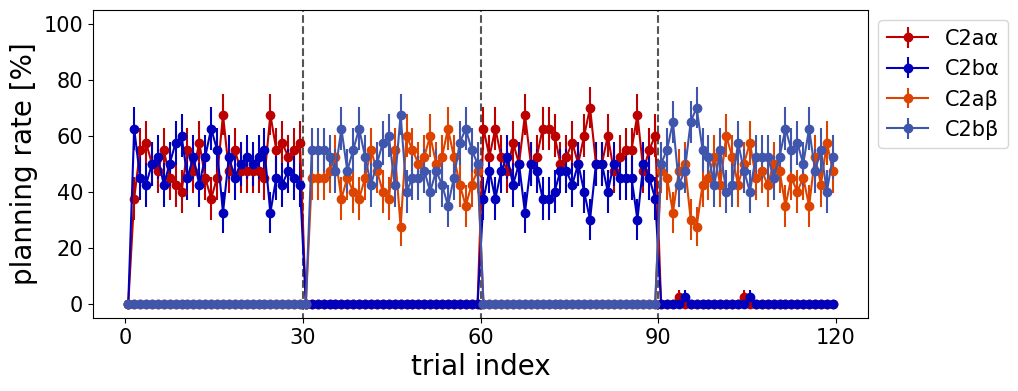

In [35]:
lbls = ["C2aα","C2bα","C2aβ","C2bβ"]
clrs = ["#bc0000","#0000bc", "#dc4400","#4055ac"]
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-10,110], "--",color = "#555555")
for i in range(4):
    h0 = plt.errorbar(np.arange(trialnum), np.nanmean(preratio2[:,:,i],0)*100, \
                  100*np.nanstd(preratio2[:,:,i],0)/np.sqrt(num),fmt="o-", color=clrs[i],label = lbls[i])
plt.legend(bbox_to_anchor=(1,1), fontsize=15)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("planning rate [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/switch_prob_2cond_{}_preratio.png".format(0.5), bbox_inches = "tight")

In [8]:
oddsum = np.zeros((num,trialnum,4))*np.nan
for n in range(num):
    for t in range(trialnum):
        try:
            oddsum[n,t,:] = oddcounter[n][t]
            oddsum[n,t,3] += oddsum[n,t,1]
        except:
            print("error", n,t)

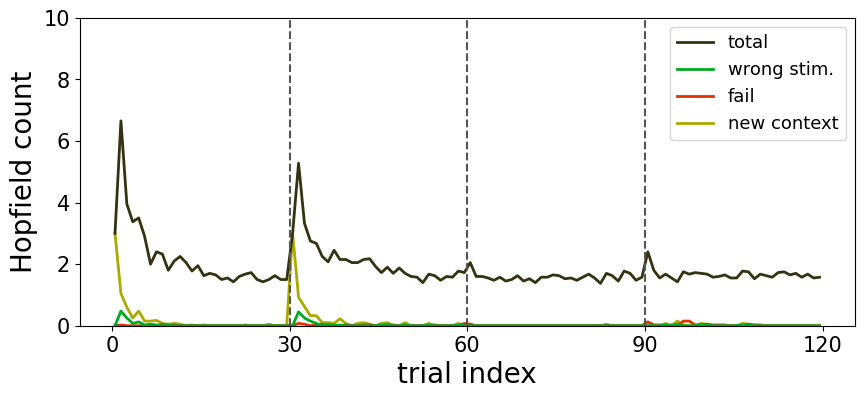

In [10]:
plt.figure(figsize = (10,4))
lbl = ["total","wrong stim.","fail","new context"]
clr = ["#333311","#00aa22","#dd3300","#aaaa00"]
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,12], "--",color = "#555555")
for i in range(4):
    h = plt.plot(np.nanmean(oddsum[:,:,i],axis = 0), label = lbl[i], linewidth = 2, color = clr[i],zorder = -i)

plt.legend(fontsize = 13)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("Hopfield count", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(np.arange(0,11,2),fontsize = 15) 
plt.ylim([0,10])
plt.savefig("./figure/switch_prob_2cond_{}_odds.png".format(0.5), bbox_inches = "tight")

In [38]:
choicerate = np.zeros((num,trialnum,2))*np.nan
for x in range(num):
    for r,res in enumerate(allresult[x]):
        rwd,cnd,init = res[-1]["rwd"], res[-1]["cond"], res[0]["cond"]
        if init == 1:
            choice = (cnd == 4)*rwd + (cnd == 5)*(1-rwd)
        else:
            choice = (cnd == 5)*rwd + (cnd == 4)*(1-rwd)
        if choice:
            choicerate[x,r,0] = (cnd == 4)
        else:
            choicerate[x,r,1] = (cnd == 4)

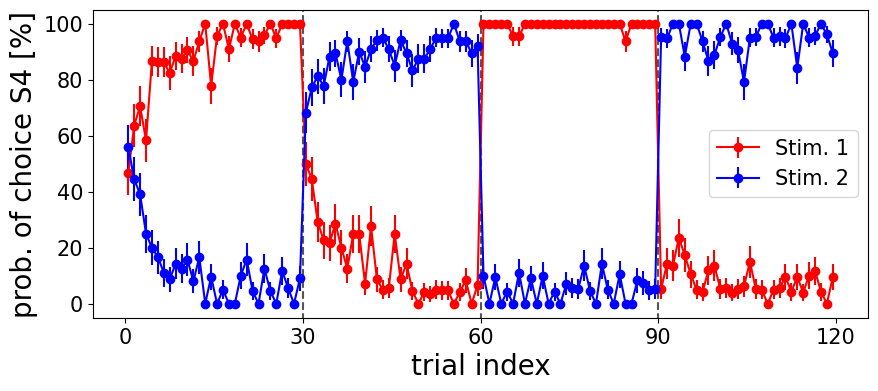

In [39]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-10,110], "--",color = "#555555")
h1 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,0],0)*100, \
                  100*np.nanstd(choicerate[:,:,0],0)/np.sqrt(num),fmt="ro-", label = "Stim. 1")
h2 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,1],0)*100, \
                  100*np.nanstd(choicerate[:,:,1],0)/np.sqrt(num),fmt="bo-", label = "Stim. 2")
plt.legend(fontsize=15)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("prob. of choice S4 [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/switch_prob_2cond_{}_choice.png".format(hp.prob), bbox_inches = "tight")

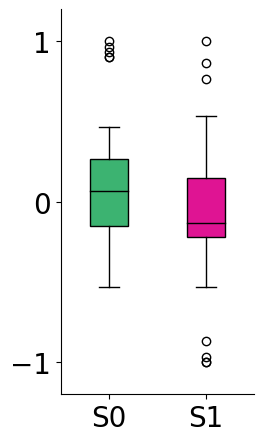

In [40]:
pred1 = np.array([np.nanmean(preratio[i,60:90,:],0) for i in range(num)
                if not all(np.isnan(preratio[i,60:90,:]).ravel())])
pred2 = np.array([np.nanmean(preratio[i,90:120,:],0) for i in range(num)
                if not all(np.isnan(preratio[i,90:120,:]).ravel())])
fig=plt.figure(figsize=(2.5,5))
ax=fig.add_subplot(111)
bp=ax.boxplot(pred1[:,0]-pred1[:,1],patch_artist=True,medianprops=dict(color='black', linewidth=1),
             labels = ["S0"],widths=0.4,positions = [1])
bp2=ax.boxplot(pred2[:,0]-pred2[:,1],patch_artist=True,medianprops=dict(color='black', linewidth=1),
             labels = ["S1"],widths=0.4,positions = [2])
colors=['#3cb371', '#dF1493']
plt.xticks(fontsize = 20)
plt.yticks([-1,0,1],fontsize = 20)
plt.ylim([-1.2,1.2])
# boxの色の設定

bp['boxes'][0].set(color='black', linewidth=1)  # boxの外枠の色
bp['boxes'][0].set_facecolor(colors[0]) # boxの色
bp2['boxes'][0].set(color='black', linewidth=1)  # boxの外枠の色
bp2['boxes'][0].set_facecolor(colors[1]) # boxの色
ax.tick_params(right=False, top=False, labelright=False, labeltop=False)
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig("./figure/switch_prob_2cond_{}_box.png".format(0.5), bbox_inches="tight")

In [23]:
import scipy
scipy.stats.mannwhitneyu(pred1[:,0]-pred1[:,1],pred2[:,0]-pred2[:,1])

MannwhitneyuResult(statistic=1001.0, pvalue=0.05290891347498014)